In [1]:
import os
import yaml

# CLI config

In [2]:
cli = {}
cli['config'] = './config/zs_config.yml'
cli['log_dir'] = './test_log'

if cli['log_dir'] is None:
        cli['log_dir'] = input ("Enter directory to save model and logs:")
    
if not os.path.exists(cli['log_dir']):
    os.makedirs(cli['log_dir'])
else:
    print(f"{cli['log_dir']} directory: exists")

with open(cli['config'], 'r') as f:
    args = yaml.safe_load(f)

print(args.keys())

./test_log directory: exists
dict_keys(['device', 'global_macros', 'loaders', 'model', 'trainer', 'firelight'])


In [3]:
import importlib
import operator
from typing import Callable

import torch
from packaging.version import Version
from pkg_resources import DistributionNotFound
from pytorch_lightning.utilities import _module_available

#from pl_bolts.callbacks.verification.batch_gradient import BatchGradientVerification  # type: ignore


# Ported from https://github.com/PyTorchLightning/pytorch-lightning/blob/master/pytorch_lightning/utilities/imports.py
def _compare_version(package: str, op: Callable, version: str) -> bool:
    """Compare package version with some requirements.

    >>> _compare_version("torch", operator.ge, "0.1")
    True
    """
    try:
        pkg = importlib.import_module(package)
    except (ModuleNotFoundError, DistributionNotFound):
        return False
    try:
        pkg_version = Version(pkg.__version__)
    except TypeError:
        # this is mock by sphinx, so it shall return True ro generate all summaries
        return True
    return op(pkg_version, Version(version))


_NATIVE_AMP_AVAILABLE: bool = _module_available("torch.cuda.amp") and hasattr(torch.cuda.amp, "autocast")

_TORCHVISION_AVAILABLE: bool = _module_available("torchvision")
_GYM_AVAILABLE: bool = _module_available("gym")
_SKLEARN_AVAILABLE: bool = _module_available("sklearn")
_PIL_AVAILABLE: bool = _module_available("PIL")
_OPENCV_AVAILABLE: bool = _module_available("cv2")
_WANDB_AVAILABLE: bool = _module_available("wandb")
_MATPLOTLIB_AVAILABLE: bool = _module_available("matplotlib")
_TORCHVISION_LESS_THAN_0_9_1: bool = _compare_version("torchvision", operator.lt, "0.9.1")
_PL_GREATER_EQUAL_1_4 = _compare_version("pytorch_lightning", operator.ge, "1.4.0")
_PL_GREATER_EQUAL_1_4_5 = _compare_version("pytorch_lightning", operator.ge, "1.4.5")
_TORCH_ORT_AVAILABLE = _module_available("torch_ort")
_TORCH_MAX_VERSION_SPARSEML = _compare_version("torch", operator.lt, "1.10.0")
_SPARSEML_AVAILABLE = _module_available("sparseml") and _PL_GREATER_EQUAL_1_4_5 and _TORCH_MAX_VERSION_SPARSEML

if not _PIL_AVAILABLE:  # pragma: no cover
    raise ModuleNotFoundError("PIL is required but not installed.")
if not _TORCHVISION_AVAILABLE:  # pragma: no cover
    raise ModuleNotFoundError("You want to use `torchvision` which is not installed yet.")

#__all__ = ["BatchGradientVerification"]

In [4]:
print(f"_NATIVE_AMP_AVAILABLE: {_NATIVE_AMP_AVAILABLE}")

print(f"_TORCHVISION_AVAILABLE: {_TORCHVISION_AVAILABLE}")
print(f"_GYM_AVAILABLE: {_GYM_AVAILABLE}")
print(f"_SKLEARN_AVAILABLE: {_SKLEARN_AVAILABLE}")
print(f"_PIL_AVAILABLE: {_PIL_AVAILABLE}")
print(f"_OPENCV_AVAILABLE: {_OPENCV_AVAILABLE}")
print(f"_WANDB_AVAILABLE: {_WANDB_AVAILABLE}")
print(f"_MATPLOTLIB_AVAILABLE: {_MATPLOTLIB_AVAILABLE}")
print(f"_TORCHVISION_LESS_THAN_0_9_1: {_TORCHVISION_LESS_THAN_0_9_1}")
print(f"_PL_GREATER_EQUAL_1_4: {_PL_GREATER_EQUAL_1_4}")
print(f"_PL_GREATER_EQUAL_1_4_5: {_PL_GREATER_EQUAL_1_4_5}")
print(f"_TORCH_ORT_AVAILABLE: {_TORCH_ORT_AVAILABLE}")
print(f"_TORCH_MAX_VERSION_SPARSEML: {_TORCH_MAX_VERSION_SPARSEML}")
print(f"_SPARSEML_AVAILABLE: {_SPARSEML_AVAILABLE}")

_NATIVE_AMP_AVAILABLE: True
_TORCHVISION_AVAILABLE: True
_GYM_AVAILABLE: False
_SKLEARN_AVAILABLE: True
_PIL_AVAILABLE: True
_OPENCV_AVAILABLE: False
_WANDB_AVAILABLE: True
_MATPLOTLIB_AVAILABLE: True
_TORCHVISION_LESS_THAN_0_9_1: False
_PL_GREATER_EQUAL_1_4: True
_PL_GREATER_EQUAL_1_4_5: True
_TORCH_ORT_AVAILABLE: False
_TORCH_MAX_VERSION_SPARSEML: False
_SPARSEML_AVAILABLE: False


In [5]:
import os

import numpy as np
from torch.utils.data import Dataset

#from pl_bolts.utils import _PIL_AVAILABLE
#from pl_bolts.utils.warnings import warn_missing_pkg

if _PIL_AVAILABLE:
    from PIL import Image
else:  # pragma: no cover
    print(f"Warning missing pkg: Pillow")

In [6]:
print(args['loaders'])
print(args['loaders'].keys())

{'dataset_config': {'general': {'ds_class': ['utils.dataset.phosc.PHOSCZSDataset', 'utils.dataset.phosc.ImageDataset', 'utils.dataset.phosc.PhosDataset', 'utils.dataset.phosc.PhocDataset', 'utils.dataset.phosc.WordlabelDataset'], 'type': 'dir', 'raw': None, 'label': None, 'unseen': None, 'transforms': None}, 'train': {'raw': '/media/windowsC/SIN_Desktop/projects/ZSL_WordSpotting/unit_test_data/train', 'label': '/media/windowsC/SIN_Desktop/projects/ZSL_WordSpotting/unit_test_data/train.csv'}, 'valid': {'raw': '/media/windowsC/SIN_Desktop/projects/ZSL_WordSpotting/unit_test_data/val', 'label': '/media/windowsC/SIN_Desktop/projects/ZSL_WordSpotting/unit_test_data/val.csv'}}, 'loader_config': {'utils.dataloader.phosc.PHOSCZSDataModule': {'seed': 1234, 'drop_last': False, 'pin_memory': True, 'shuffle': True, 'batch_size': 10, 'num_workers': 10}}}
dict_keys(['dataset_config', 'loader_config'])


In [7]:
from utils.generic.parsing import recursive_parse_settings
from utils.generic.getaccess import get_class_from_str

In [8]:
dataset_config = args['loaders']['dataset_config']
loader_config = args['loaders']['loader_config']
print(dataset_config)
print(loader_config)

{'general': {'ds_class': ['utils.dataset.phosc.PHOSCZSDataset', 'utils.dataset.phosc.ImageDataset', 'utils.dataset.phosc.PhosDataset', 'utils.dataset.phosc.PhocDataset', 'utils.dataset.phosc.WordlabelDataset'], 'type': 'dir', 'raw': None, 'label': None, 'unseen': None, 'transforms': None}, 'train': {'raw': '/media/windowsC/SIN_Desktop/projects/ZSL_WordSpotting/unit_test_data/train', 'label': '/media/windowsC/SIN_Desktop/projects/ZSL_WordSpotting/unit_test_data/train.csv'}, 'valid': {'raw': '/media/windowsC/SIN_Desktop/projects/ZSL_WordSpotting/unit_test_data/val', 'label': '/media/windowsC/SIN_Desktop/projects/ZSL_WordSpotting/unit_test_data/val.csv'}}
{'utils.dataloader.phosc.PHOSCZSDataModule': {'seed': 1234, 'drop_last': False, 'pin_memory': True, 'shuffle': True, 'batch_size': 10, 'num_workers': 10}}


In [9]:
loader_key, loader_config_value = next(iter(loader_config.items()))
loader_class = get_class_from_str(loader_key)
phosc_loader = loader_class(dataset_config, loader_config_value)
phosc_loader.prepare_data()

trainset_sz = len(phosc_loader.trainset)
validset_sz = len(phosc_loader.validset)
print(f"size(trainset): {trainset_sz}, size(validset): {validset_sz}")

size(trainset): 38, size(validset): 11


# Test <code>dataset</code>

In [10]:
import math
def get_data_from_dataset(dataset, n_epochs, steps_per_epoch, batch_size):
    for epoch_idx in range(n_epochs):
        for batch_idx in range(steps_per_epoch):
            batch_dict = {}
            for idx in range(batch_size):
                sample = next(iter(dataset))
                if len(batch_dict) ==0 :
                    for key, value in sample.items():
                        batch_dict[key] = [value]
                else:
                    for key, value in sample.items():
                        batch_dict[key] += [value]
            
            for key, value in batch_dict.items():
                batch_dict[key] = np.array(value)
                
            '''print(f"batch_idx: {batch_idx}, sample_batch: {batch_dict.keys()}")
            
            for key,value in batch_dict.items():
                print(f"key: {value.shape}")'''

get_data_from_dataset(phosc_loader.trainset, 
                      3, 
                      math.ceil(trainset_sz/loader_config_value['batch_size']), 
                      loader_config_value['batch_size'])
get_data_from_dataset(phosc_loader.validset, 
                      3, 
                      math.ceil(trainset_sz/loader_config_value['batch_size']), 
                      loader_config_value['batch_size'])

# Test <code>loader</code>

idx: 0, key: img, shape: torch.Size([10, 50, 250, 3])
idx: 0, key: phos, shape: torch.Size([10, 165])
idx: 0, key: phoc, shape: torch.Size([10, 604])
idx: 0, key: wlabel, shape: torch.Size([10])
['of' 'in' 'such' 'the' 'writing' 'but' 'such' 'of' 'but' 'haste']


<Figure size 576x1152 with 0 Axes>

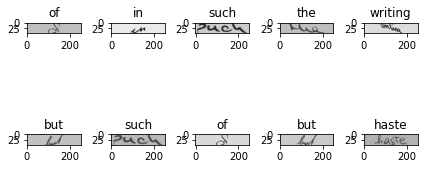

idx: 1, key: img, shape: torch.Size([10, 50, 250, 3])
idx: 1, key: phos, shape: torch.Size([10, 165])
idx: 1, key: phoc, shape: torch.Size([10, 604])
idx: 1, key: wlabel, shape: torch.Size([10])
['but' 'also' 'the' 'haste' 'but' 'the' 'haste' 'in' 'such' 'boys']


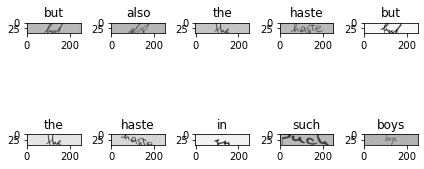

idx: 2, key: img, shape: torch.Size([10, 50, 250, 3])
idx: 2, key: phos, shape: torch.Size([10, 165])
idx: 2, key: phoc, shape: torch.Size([10, 604])
idx: 2, key: wlabel, shape: torch.Size([10])
['in' 'of' 'also' 'writing' 'also' 'writing' 'the' 'also' 'boys' 'boys']


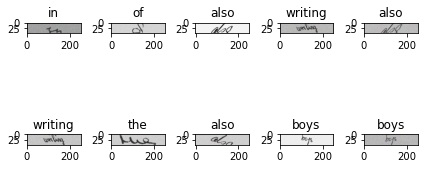

idx: 3, key: img, shape: torch.Size([8, 50, 250, 3])
idx: 3, key: phos, shape: torch.Size([8, 165])
idx: 3, key: phoc, shape: torch.Size([8, 604])
idx: 3, key: wlabel, shape: torch.Size([8])
['in' 'the' 'the' 'the' 'writing' 'such' 'haste' 'of']


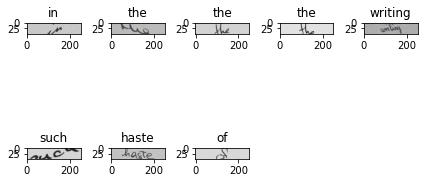

<Figure size 432x288 with 0 Axes>

In [11]:
#Plotting a Batch of DataLoader
#batch = iter(phosc_loader).next()
import matplotlib.pyplot as plt
plt.figure(figsize = (8,16))
fig, axes = plt.subplots(2, 5) # factors of batch_size
for batch_idx, batch in enumerate(phosc_loader.train_dataloader()):
    for key, value in batch.items():
        print(f"idx: {batch_idx}, key: {key}, shape: {value.shape}")
    
    #for e,(img, lbl) in enumerate(zip(images, labels)):
    images = batch['img'].numpy()
    labels = phosc_loader.wordLabelEncoder.inverse_transform(batch['wlabel'].numpy().tolist())
    print(labels)
    for idx in range(images.shape[0]):
        img = images[idx, :, :, :]
        
        plt.subplot(2, 5, idx+1)
        plt.imshow(img)
        plt.title(f'{labels[idx]}')
        
    plt.tight_layout()
    plt.show()
    val = 'y' #0
    while val != 'y':
        val = input("Enter y to continue: ")
    
    plt.clf()
    


# Run <code>model</code>

In [12]:
import torch.nn as nn
from models.phocnet.buildingblocks import create_phocnet_architecture
from models.phocnet.pyramidpooling import SpatialPyramidPooling, TemporalPyramidPooling

class PhoscFeatureHead(nn.Module):
    def __init__(self, fmaps, dropouts):
        super(PhoscFeatureHead, self).__init__()
        assert len(fmaps) >= len(dropouts)
        self.fmaps = fmaps
        self.dropouts = dropouts

    def forward(self, x):
        return self.feature_head(x, self.fmaps, self.dropouts)
    
    @staticmethod
    def feature_head(previous_conv, list_fmaps, list_dropouts):
        previous_conv_size = previous_conv.size(-1) # Expecting a flattened feature vector (N * dim)
        
        for i in range(len(list_fmaps)):
            if i < len(list_dropouts):
                if i == 0:
                    x= nn.Linear(previous_conv_size, list_fmaps[i])(previous_conv)
                else:
                    x= nn.Linear(list_fmaps[i-1], list_fmaps[i])(x)
                x = nn.ReLU()(x)
                x = nn.Dropout(list_dropouts[i])(x)
            else: #No more dropuouts
                x= nn.Linear(list_fmaps[i-1], list_fmaps[i])(x)
                x = nn.ReLU()(x)
        
        return x
        
class PHOSCNet(nn.Module):
    def __init__(self,
                 conv_in_ch,
                 conv_fmaps,
                 conv_type='2D',
                 conv_layer_order='gcr',
                 conv_num_groups=8, 
                 conv_kernel_size=3,
                 conv_stride=1,
                 conv_padding=1,
                 conv_last_single_conv_fmap=512,
                 
                 pool_layer_index=[1, 3],
                 pool_kernel_size=2,
                 pool_stride=2,
                 pool_padding=0,
                 
                 pyramid_pool_type='spatial',
                 pyramid_pool_levels=[1, 2, 4],
                 
                 phos_head_fmaps=[4096, 4096, 165],
                 phos_head_dropout=[0.5, 0.5],
                 
                 phoc_head_fmaps=[4096, 4096, 604],
                 phoc_head_dropout=[0.5, 0.5],
                 
                 **kwargs):
        super(PHOSCNet, self).__init__()

        assert isinstance(conv_fmaps, list) or isinstance(conv_fmaps, tuple)
        assert len(conv_fmaps) > 1, "Required at least 2 levels in the CNN feature extractor"
        
        # create CNN feature extractor architecture
        self.cnn_arch = create_phocnet_architecture(conv_type,
                                                    conv_in_ch,
                                                    conv_fmaps,
                                                    conv_kernel_size,
                                                    conv_padding,
                                                    conv_layer_order,
                                                    conv_num_groups,
                                                    pool_layer_index,
                                                    pool_kernel_size,
                                                    pool_stride,
                                                    pool_padding,
                                                    conv_last_single_conv_fmap)
        
        # create pyramid pooling layer
        if pyramid_pool_type == 'spatial':
            self.pp_layer = SpatialPyramidPooling(pyramid_pool_levels)
        elif pyramid_pool_type == 'temporal':
            self.pp_layer = TemporalPyramidPooling(pyramid_pool_levels)
        else:
            raise ValueError(f"Unsupported pyramid pooling type '{pyramid_pool_type}'. MUST be one of ['spatial', 'temporal']")
        
        # create phos, phoc heads
        self.phos_head = PhoscFeatureHead(phos_head_fmaps, phos_head_dropout)
        self.phoc_head = PhoscFeatureHead(phoc_head_fmaps, phoc_head_dropout)
        

    def forward(self, x):
        for idx, layer in enumerate(self.cnn_arch):
            x = layer(x)
            #print(f'Layer{idx}: {x.shape}')
        x = self.pp_layer.forward(x)
        phos_feat = self.phos_head(x)
        phoc_feat = self.phoc_head(x)
        return phos_feat, phoc_feat

In [13]:
def append_key_to_subconfig(main_key, subconfig):
    config = {}
    for key, value in subconfig.items():
        new_key = '_'.join([main_key, key])
        config[new_key] = value
    return config

_model_config = next(iter(args['model'].values()))
model_config = {}
    
for key, value in _model_config.items():
    _config = append_key_to_subconfig(key, value)
    model_config.update(_config)
print(model_config)

{'conv_in_ch': 3, 'conv_fmaps': [64, 128, 256, 256, 256, 512], 'conv_kernel_size': 3, 'conv_stride': 1, 'conv_padding': 1, 'conv_layer_order': 'cr', 'conv_last_single_conv_fmap': 512, 'pool_layer_index': [1, 3], 'pool_kernel_size': 2, 'pool_stride': 2, 'pool_padding': 0, 'pyramid_pooling_type': 'spatial', 'pyramid_pooling_levels': [1, 2, 4], 'phos_head_fmaps': [4096, 4096, 165], 'phos_head_dropout': [0.5, 0.5], 'phoc_head_fmaps': [4096, 4096, 604], 'phoc_head_dropout': [0.5, 0.5]}


In [14]:
conv_in_ch = model_config.pop('conv_in_ch')
conv_fmaps = model_config.pop('conv_fmaps')
model = PHOSCNet(conv_in_ch, conv_fmaps, **model_config)
print(model.cnn_arch)

ModuleList(
  (DoubleConv_1): DoubleConv(
    (SingleConv1): SingleConv(
      (conv): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (ReLU): ReLU(inplace=True)
    )
    (SingleConv2): SingleConv(
      (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (ReLU): ReLU(inplace=True)
    )
  )
  (MaxPooling_1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (DoubleConv_2): DoubleConv(
    (SingleConv1): SingleConv(
      (conv): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (ReLU): ReLU(inplace=True)
    )
    (SingleConv2): SingleConv(
      (conv): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (ReLU): ReLU(inplace=True)
    )
  )
  (MaxPooling_2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (DoubleConv_3): DoubleConv(
    (SingleConv1): SingleConv(
      (conv): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), paddi

In [15]:
for batch_idx, batch in enumerate(phosc_loader.train_dataloader()):
    xx = torch.permute(batch['img'], (0, 3, 1, 2)).float()
    cnn_feats = model.forward(xx)
    print(cnn_feats[0].shape, cnn_feats[1].shape)


torch.Size([10, 165]) torch.Size([10, 604])
torch.Size([10, 165]) torch.Size([10, 604])
torch.Size([10, 165]) torch.Size([10, 604])
torch.Size([8, 165]) torch.Size([8, 604])
